In [1]:
import warnings
from pylj import md, sample, pairwise
import numpy as np
import matplotlib.pyplot as plt
import time

warnings.filterwarnings('ignore')

In [2]:
def md_simulation(number_of_particles, temperature, box_length, number_of_steps, sample_frequency):
    # Initialise the system
    constants=[[1.363e-134, 9.273e-78],[1.365e-130, 9.278e-77],[1.368e-130, 9.278e-77]]
    system = md.initialise(number_of_particles, temperature, box_length, 'square', constants=constants)
    # This sets the sampling class
    sample_system = sample.MaxBolt(system)# Start at time 0
    system.time = 0
    # Begin the molecular dynamics loop
    for i in range(0, number_of_steps):
        # Run the equations of motion integrator algorithm, this 
        # includes the force calculation
        system.integrate(md.velocity_verlet)
        # Sample the thermodynamic and structural parameters of the system
        system.md_sample()
        # Allow the system to interact with a heat bath
        system.heat_bath(temperature)
        # Iterate the time
        system.time += system.timestep_length
        system.step += 1
        # At a given frequency sample the positions and plot the RDF
        if system.step % sample_frequency == 0:
            sample_system.update(system)
    return system

The `md_simulation` function takes five variables:
- The number of particles
- The simulation temperature
- The simulation cell vector
- The number of steps
- The sampling frequency (how often the image is updated)

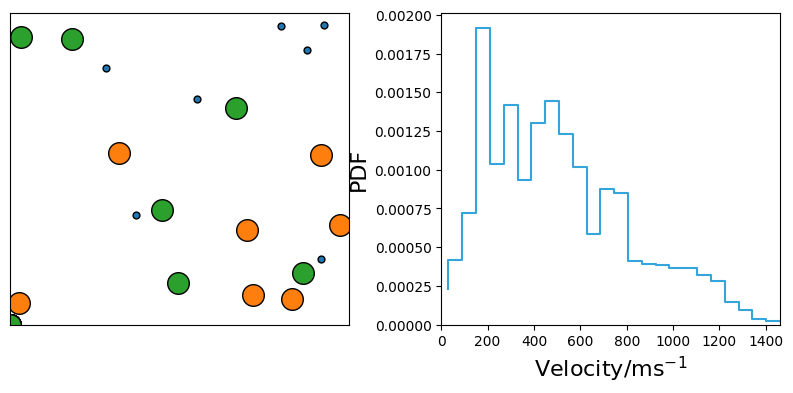

In [4]:
system = md_simulation(20, 1000, 100, 5000, 25)